In [27]:
import pandas as pd
from omegaconf import DictConfig
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [8]:
config = OmegaConf.load("configs/plot_bad_tracks.yaml")
print(config.output_dir)

/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/Run100Evts/Results_GNN/bad_tracks


In [5]:
fname = config.output_dir + "/bad_tracks.parquet"
df = pd.read_parquet(fname)

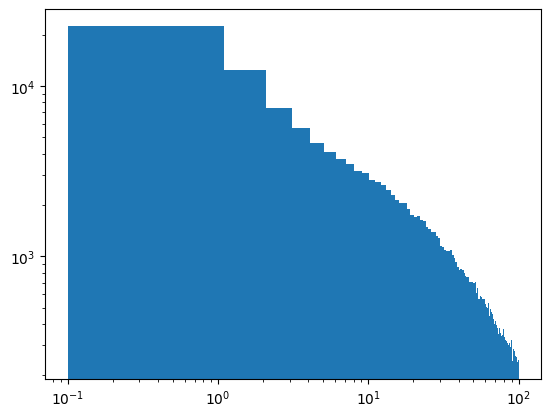

In [11]:
plt.xscale("log")
plt.hist(df['chi2/ndof'], bins=100, range=(0.1, 100), log=True);

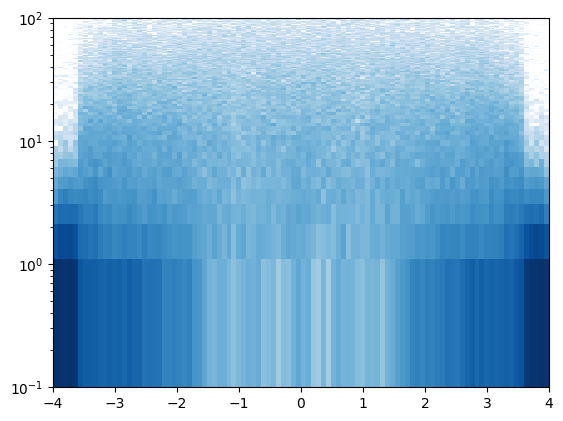

In [29]:
plt.hist2d(df['eta'], df['chi2/ndof'], range=((-4, 4), (0.1, 100)), 
           cmap='Blues', norm=colors.LogNorm());
plt.yscale("log")